# Описание проекта

 > **Бриф**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

> **Задачи:**

*Часть 1*:

Приоритизировать гипотезы методом ICE и RICE 

*Часть 2*:

Запустить A/B-тест и проанализировать результаты.


In [3]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
# открываем файлы
try:
    h = pd.read_csv('/content/hypothesis.csv')
    o = pd.read_csv('/content/orders.csv')
    v = pd.read_csv('/content/visitors.csv')
except:
    h = pd.read_csv('/datasets/hypothesis.csv')
    o = pd.read_csv('/datasets/orders.csv')
    v = pd.read_csv('/datasets/visitors.csv')

In [5]:
# ширину колонки для просмотра текста
pd.set_option('display.max_colwidth', None)

# Часть 1

# Приоритезация гипотез

In [6]:
h

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [7]:
h.columns = h.columns.str.lower()

## ICE

In [8]:
# считаем ice
h['ice'] = h['impact'] * h['confidence'] / h['efforts']

In [9]:
h.sort_values('ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


## RICE

In [10]:
# считаем rice
h['rice'] = h['impact'] * h['confidence'] * h['reach'] / h['efforts']

In [11]:
h.sort_values('rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


### Вывод:

При оценке по ICE гипотезы: 8, 0, 7 - заняли топ 3

Когда мы оцениваем RICE лидируют гипотезы: 7, 2, 0

Смена лидеров произошла из за, того что мы добавляем в RICE метрику reach(охват), число 10 нам говорит о том, что при проверке гипотезы 7 (*Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*), мы охватим 100% наших клиентов. Именно этот факт сделал 7 гипотезу лидером, рейтинга по версии RICE

# Часть 2
Предобработка данных

In [12]:
o.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [13]:
# в нижний регистр
o.columns = o.columns.str.lower()

In [14]:
# переименовываем колонки
o.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [15]:
o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [16]:
# дату в формат дата
o['date'] = pd.to_datetime(o['date'], format='%Y-%m-%d')

In [17]:
# проверка на дубликаты
o.duplicated().sum()

0

In [18]:
v.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [20]:
# дату в формат даты
v['date'] = pd.to_datetime(v['date'], format='%Y-%m-%d')

In [21]:
# проверка ну дубликаты
v.duplicated().sum()

0

In [22]:
# создаем таблицу по всем датам и группам
dates_groups = o[['date', 'group']].drop_duplicates()

In [23]:
# таблица накопленноый суммы и кол заказов
orders_aggregated = (dates_groups.apply(lambda x: o[np.logical_and(o['date'] <= x['date'], o['group'] == x['group'])]
                                        .agg({'date': 'max',
                                              'group': 'max',
                                              'transaction_id': 'nunique',
                                              'visitor_id': 'nunique',
                                              'revenue': 'sum'}), axis=1)
                     .sort_values(by=['date', 'group']))

In [24]:
orders_aggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [25]:
# таблица накопленной суммы визитов
visitors_aggregated = (dates_groups.apply(lambda x: v[np.logical_and(v['date'] <= x['date'], v['group'] == x['group'])]
                                          .agg({'date': 'max',
                                                'group': 'max',
                                                'visitors': 'sum'}), axis=1)
                       .sort_values(by=['date', 'group']))

In [26]:
visitors_aggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [27]:
# общая таблица накопленной суммы
cum_df = orders_aggregated.merge(visitors_aggregated, on=[
                                 'date', 'group'], how='left')

In [28]:
cum_df.columns = ['date', 'group', 'transaction_nunique',
                  'visitors_nunique', 'revenue_cum', 'visitors_cum']

In [29]:
cum_df

,date,group,transaction_nunique,visitors_nunique,revenue_cum,visitors_cum
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


## График кумулятивной выручки по группам.

In [30]:
cum_revenue_a = cum_df[cum_df['group'] == 'A'][[
    'date', 'transaction_nunique', 'revenue_cum']]

In [31]:
cum_revenue_b = cum_df[cum_df['group'] == 'B'][[
    'date', 'transaction_nunique', 'revenue_cum']]

In [32]:
plt.rcParams["figure.figsize"] = (10, 6)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

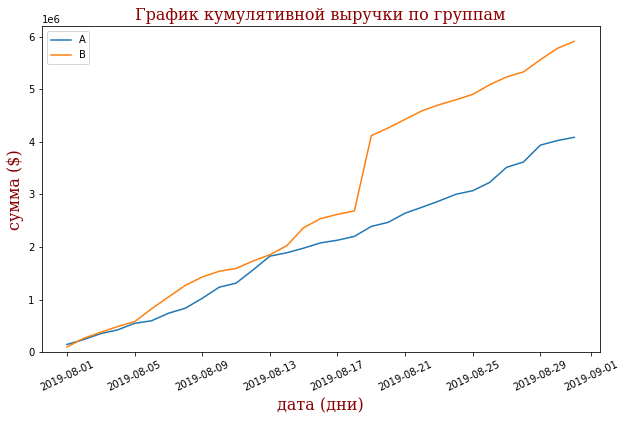

In [33]:
# график накопленной суммы по группам
plt.plot(cum_revenue_a['date'], cum_revenue_a['revenue_cum'], label='A')
plt.plot(cum_revenue_b['date'], cum_revenue_b['revenue_cum'], label='B')
plt.title('График кумулятивной выручки по группам', fontdict=font)
plt.legend()
plt.xticks(rotation=25)
plt.xlabel('дата (дни)', fontdict=font)
plt.ylabel('сумма ($)', fontdict=font)
plt.ylim(0)
plt.show()

### Вывод:
В начале группа А и В практически равны по выручке, начиная с 2019-08-17 дня, мы видим резкий всплеск по выручке в группе В. Далее графики растут синхронно. Всплеск возьожно связан, с не тепично большими заказами в эту дату. 

## График кумулятивного среднего чека по группам.

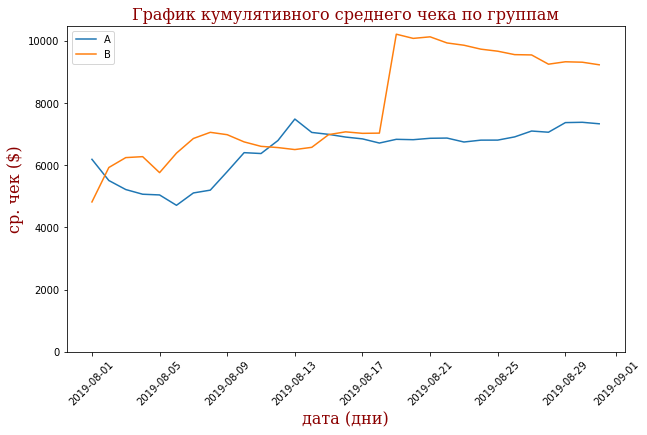

In [34]:
plt.plot(cum_revenue_a['date'],
         cum_revenue_a['revenue_cum'] / cum_revenue_a['transaction_nunique'],
         label='A')
plt.plot(cum_revenue_b['date'],
         cum_revenue_b['revenue_cum'] / cum_revenue_b['transaction_nunique'],
         label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам', fontdict=font)
plt.xticks(rotation=45)
plt.xlabel('дата (дни)', fontdict=font)
plt.ylabel('ср. чек ($)', fontdict=font)
plt.ylim(0)
plt.show()

### Вывод:
Из графика видно что группа А почти всегда ниже по среднему чеку, видим пик 2019-08-13, далее группа А показывает медленный рост. Отмечу, 2019-08-01 средний чек начинается сразу с 6000, далее идет уменьшение чека до 4500. У группы В в ту дату тоже снижение среднего чека. 

Группа В и ее средний чек сильно выше группы А, 2019-08-17 мы видим сильный рост среднего чека, возможно вызванный боьлшой покупкой. На графике накопленной суммы, в эту дату так же виден всплеск.   

## График относительного изменения кумулятивного среднего чека группы B к группе A. 

In [35]:
merged_cum_revenue = cum_revenue_a.merge(
    cum_revenue_b, on='date', how='left', suffixes=['_a', '_b'])

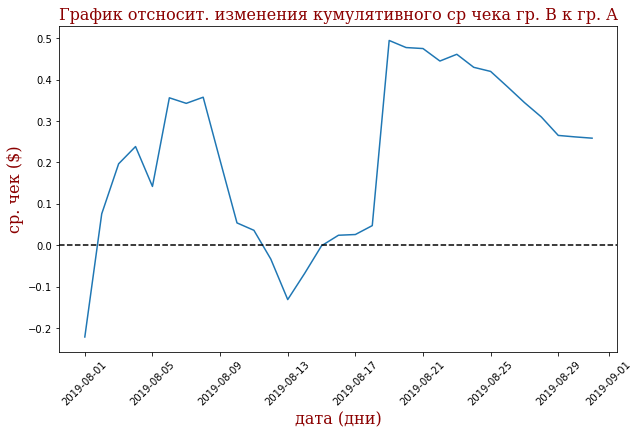

In [36]:
# cтроим отношение средних чеков
plt.plot(merged_cum_revenue['date'],
         (merged_cum_revenue['revenue_cum_b'] /
          merged_cum_revenue['transaction_nunique_b']) /
         (merged_cum_revenue['revenue_cum_a'] /
          merged_cum_revenue['transaction_nunique_a'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title(
    'График отсносит. изменения кумулятивного ср чека гр. B к гр. A', fontdict=font)
plt.xlabel('дата (дни)', fontdict=font)
plt.ylabel('ср. чек ($)', fontdict=font)
plt.show()

### Вывод:
На графике видно, что группа А и В различаются. Группа В больше. График резко скачет возможно связано с аномальными значениями.

## График кумулятивной конверсии по группам.

In [37]:
# считаем кумулятивную конверсию
cum_df['conversion'] = cum_df['transaction_nunique']/cum_df['visitors_cum']

In [38]:
cum_df_a = cum_df[cum_df['group'] == 'A']

In [39]:
cum_df_b = cum_df[cum_df['group'] == 'B']

In [40]:
# мин и мах даты наблюдения
min_dt = cum_df['date'].min().date()
max_dt = cum_df['date'].max().date()

print(min_dt)
print(max_dt)

2019-08-01
2019-08-31


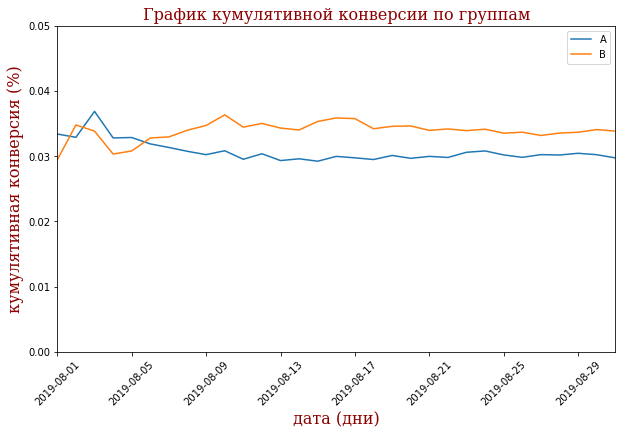

In [41]:
plt.plot(cum_df_a['date'], cum_df_a['conversion'], label='A')
plt.plot(cum_df_b['date'], cum_df_b['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам', fontdict=font)
plt.xticks(rotation=45)
plt.axis([min_dt, max_dt, 0, 0.05])
plt.xlabel('дата (дни)', fontdict=font)
plt.ylabel('кумулятивная конверсия (%)', fontdict=font)
plt.show()

### Вывод:
Группы В и группа А различаются, у грпуппы В конверсия выше. 

## График относительного изменения кумулятивной конверсии группы B к группе A.

In [42]:
# общая таблица двух групп по накопленной конверсии
merged_cum_conversions = cum_df_a[['date', 'conversion']].merge(
    cum_df_b[['date', 'conversion']], on='date', how='left', suffixes=['_a', '_b'])

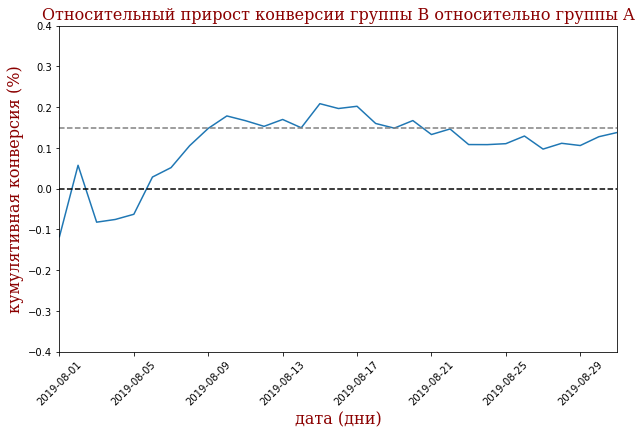

In [43]:
plt.plot(merged_cum_conversions['date'],
         merged_cum_conversions['conversion_b'] /
         merged_cum_conversions['conversion_a']-1)
plt.title(
    'Относительный прирост конверсии группы B относительно группы A', fontdict=font)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([min_dt, max_dt, -0.40, 0.40])
plt.xticks(rotation=45)
plt.xlabel('дата (дни)', fontdict=font)
plt.ylabel('кумулятивная конверсия (%)', fontdict=font)
plt.show()

### Вывод:
Прирост коневерсии группы В относительно А, в среднем около 15%, начиная с 3го дня наблюдений.

## Точечный график количества заказов по пользователям.

In [44]:
# таблица заказов на каждого пользователя
orders_user = o.groupby('visitor_id')[
    'transaction_id'].agg('nunique').reset_index()

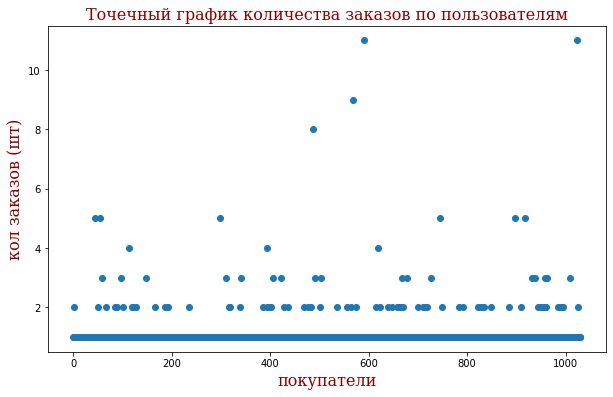

In [45]:
x_values = pd.Series(range(0, len(orders_user)))
plt.scatter(x_values, orders_user['transaction_id'])
plt.title('Точечный график количества заказов по пользователям', fontdict=font)
plt.xlabel('покупатели', fontdict=font)
plt.ylabel('кол заказов (шт)', fontdict=font)
plt.show()

### Вывод:
В основном у пользоватлей 1 или 2 заказа. Построим процентили посмотрим выбросы.

## 95-й и 99-й перцентили количества заказов на пользователя. Определить границу аномальных пользователей.

In [46]:
np.percentile(orders_user['transaction_id'], [95, 99])

array([2., 4.])

Граница аномальных пользователей по колчеству заказов <4

## Точечный график стоимостей заказов.

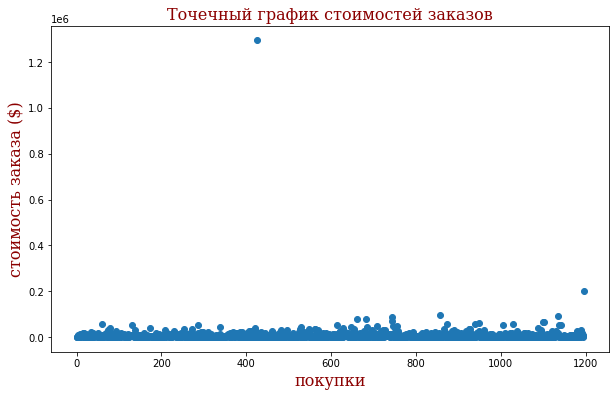

In [47]:
x_values = pd.Series(range(0, len(o['revenue'])))
plt.scatter(x_values, o['revenue'])
plt.title('Точечный график стоимостей заказов', fontdict=font)
plt.xlabel('покупки', fontdict=font)
plt.ylabel('стоимость заказа ($)', fontdict=font)
plt.show()

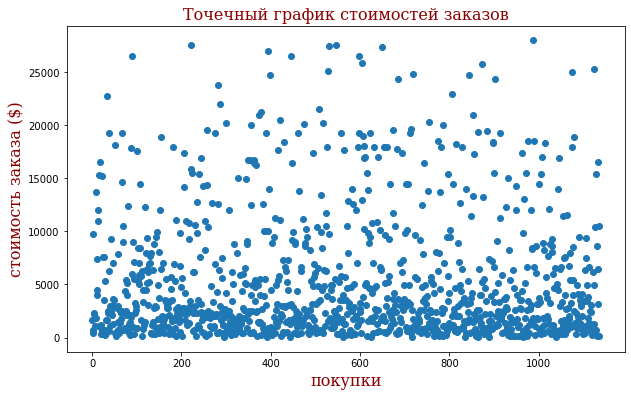

In [48]:
x_values = pd.Series(range(0, len(o.query('revenue < 28000')['revenue'])))
plt.scatter(x_values, o.query('revenue < 28000')['revenue'])
plt.title('Точечный график стоимостей заказов', fontdict=font)
plt.xlabel('покупки', fontdict=font)
plt.ylabel('стоимость заказа ($)', fontdict=font)
plt.show()

### Вывод:
Больше всего заказов до 5000, чем дороже покупка тем меньше клиентов. 

## 95-й и 99-й перцентили стоимости заказов. Определить границу для аномальных заказов.

In [49]:
np.percentile(o['revenue'], [95, 99])

array([28000. , 58233.2])

Граница анoмальных заказов по выручке <28000

## Общая таблица по накопленным суммам выручки, заказов, разделенная на группы А и В

In [50]:
visitors_a_daily = v[v['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_date_a']

In [51]:
visitors_b_daily = v[v['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_date_b']

In [52]:
visitors_a_cum = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']]
    .agg({'date': 'max',
          'visitors_date_a': 'sum'}),
    axis=1)
visitors_a_cum.columns = ['date', 'visitors_cum_a']

In [53]:
visitors_b_cum = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']]
    .agg({'date': 'max',
          'visitors_date_b': 'sum'}),
    axis=1)
visitors_b_cum.columns = ['date', 'visitors_cum_b']

In [54]:
orders_a_daily = (
    o[o['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_date_a', 'revenue_date_a']

In [55]:
orders_b_daily = (
    o[o['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_date_b', 'revenue_date_b']

In [56]:
orders_a_cum = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_date_a': 'sum', 'revenue_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_a_cum.columns = [
    'date', 'orders_cummulative_a', 'revenue_cummulative_a']

In [57]:
orders_b_cum = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_date_b': 'sum', 'revenue_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_b_cum.columns = [
    'date', 'orders_cummulative_b', 'revenue_cummulative_b']

In [58]:
df = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cum, left_on='date', right_on='date', how='left')
    .merge(orders_b_cum, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cum, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cum, left_on='date', right_on='date', how='left')
)

In [59]:
df.head()

,date,orders_date_a,revenue_date_a,orders_date_b,revenue_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_date_a,visitors_date_b,visitors_cum_a,visitors_cum_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


# A/B Test

## Cтатистическая значимость различий в конверсии между группами по «сырым» данным

Н0: различий в конверсии, между группами, нет. 

H1: различия в конверсии, между группами, есть.

Alpha == 0.01


In [60]:
# таблица кол заказов группы А
orders_by_users_a = (
    o[o['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'}))

In [61]:
orders_by_users_a.columns = ['user_id', 'orders']

In [62]:
# таблица кол заказов группы В
orders_by_users_b = (
    o[o['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'}))

In [63]:
orders_by_users_b.columns = ['user_id', 'orders']

In [64]:
sample_a = pd.concat(
    [orders_by_users_a['orders'],
     pd.Series(0,
               index=np.arange(df['visitors_date_a'].sum() -
                               len(orders_by_users_a['orders'])),
               name='orders')],
    axis=0)

In [65]:
sample_b = pd.concat(
    [orders_by_users_b['orders'],
     pd.Series(0,
               index=np.arange(df['visitors_date_b'].sum() -
                               len(orders_by_users_b['orders'])),
               name='orders')],
    axis=0)

In [66]:
print('p-value:', "{0:.3f}".format(
    stats.mannwhitneyu(sample_a, sample_b,
                       alternative='two-sided')[1]))

print('разница в конверсии кол заказов', "{0:.3f}".format(
    sample_b.mean() / sample_a.mean() - 1))

p-value: 0.017
разница в конверсии кол заказов 0.138


### Вывод:
p-value == 0.017 > alpha == 0.01 

Н0 отвергнуть не получилось, значимой разницы в конверсии между группами не наблюдается

Разница в конверсии между группами 0.138, у группы В конверсия больше

## Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

Н0: различий в среднем чеке, между группами, нет.

H1: различия в среднем чеке, между группами, есть.

Alpha == 0.01


In [67]:
print('p-value:', '{0:.3f}'.format(
    stats.mannwhitneyu(
        o[o['group'] == 'A']['revenue'],
        o[o['group'] == 'B']['revenue'],
        alternative='two-sided')[1]))

print('разница конверсии среднего чека', '{0:.3f}'.format(
    o[o['group'] == 'B']['revenue'].mean() /
    o[o['group'] == 'A']['revenue'].mean()-1))

p-value: 0.729
разница конверсии среднего чека 0.259


### Вывод:
p-value == 0.729 > alpha == 0.01 

Н0 отвергнуть не получилось, значимой разницы в среднем чеке между группами не наблюдается

Разница в конверсии среднего чека между группами 0.259, у группы В средний чек выше

## Статистическая значимость различий в конверсии между группами по «очищенным» данным.

Н0: различий в конверсии, между группами без выбросов, нет.

H1: различия в конверсии, между группами без выбросов, есть.

Alpha == 0.01

In [68]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] >= 4]['user_id'],
        orders_by_users_b[orders_by_users_b['orders'] >= 4]['user_id'],
    ],
    axis=0,
)
users_with_expensive_orders = o[o['revenue'] >= 28000]['visitor_id']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head())
print(abnormal_users.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64
63


In [69]:
sample_a_filtered = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))]['orders'],
                               pd.Series(0,
                                         index=np.arange(df['visitors_date_a'].sum(
                                         ) - len(orders_by_users_a['orders'])),
                                         name='orders')], axis=0)

sample_b_filtered = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))]['orders'],
                               pd.Series(0,
                                         index=np.arange(df['visitors_date_b'].sum(
                                         ) - len(orders_by_users_b['orders'])),
                                         name='orders')], axis=0)

In [70]:
print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered,
                                                      alternative='two-sided')[1]))

print('разница в конверсии', "{0:.3f}".format(
    sample_b_filtered.mean() / sample_a_filtered.mean() - 1))

p-value: 0.018
разница в конверсии 0.148


### Вывод:
p-value == 0.018 > alpha == 0.01 

Н0 отвергнуть не получилось, значимой разницы в конверсии между группами не наблюдается

Разница в конверсии между группами 0.148, у группы В конверсия больше. 

После удаления выбросов, ситуация не сильно поменялась.

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Н0: различий в среднем чеке, между группами без выбросов, нет.

H1: различия в среднем чеке, между группами без выбросов, есть.

Alpha == 0.01

In [71]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(
    o[np.logical_and(o['group'] == 'A',
                     np.logical_not(o['visitor_id'].isin(abnormal_users)))]['revenue'],
    o[np.logical_and(o['group'] == 'B',
                     np.logical_not(o['visitor_id'].isin(abnormal_users)))]['revenue'],
    alternative='two-sided')[1]))

print('разница в конверсии по среднему чеку', "{0:.3f}".format(
    o[np.logical_and(o['group'] == 'B',
                     np.logical_not(o['visitor_id'].isin(abnormal_users)))]['revenue'].mean() /
    o[np.logical_and(o['group'] == 'A',
                     np.logical_not(o['visitor_id'].isin(abnormal_users)))]['revenue'].mean() - 1))

p-value: 0.977
разница в конверсии по среднему чеку -0.017


### Вывод:
p-value == 0.977 > alpha == 0.01 

Н0 отвергнуть не получилось, значимой разницы в среднем чеке между группами не наблюдается

Разница в конверсии среднего чека между группами -0.017, у группы А средний чек выше. Ситуация с разницой конверсии среднего чека сильно поменялась. После удаления аномальных значений, средний чек групп А и В фактически сравнялся.

## Общий вывод

*   Во время тестирования по сырым данным, статистически важных различий между конверсией групп А и В обнаружено не было. Статистически важных различий в конверсии среднего чека групп А и В, по сырым данным, обнаружено не было. 
*   По очищенным данным, так же статистически важных различий в конверсии между группами А и В обнаружено не было. Статистически важных различий, по очищенным данным, между конверсией среднего чека групп А и В, обнаружено не было


> На основании полученных данных принято решение: **остановить тест, различий между группами не наблюдается**.